Let's see if our equations are good by simulating the system to see if it works like we expect. 
#### Unstable Pendulum (Standing up)
Let's begin with an investigation when the pendulum is standing up, not hanging down.  The model allows this with $s=1$.

<LinearIOSystem>: sys[312]
Inputs (1): ['u[0]']
Outputs (3): ['y[0]', 'y[1]', 'y[2]']
States (4): ['x[0]', 'x[1]', 'x[2]', 'x[3]']

A = [[ 0.0000e+00  1.0000e+00  0.0000e+00  0.0000e+00]
     [ 0.0000e+00 -8.2843e+01 -5.7358e+01  8.4485e-02]
     [ 0.0000e+00  0.0000e+00  0.0000e+00  1.0000e+00]
     [ 0.0000e+00 -4.8731e+03  3.9510e+03 -5.8197e+00]]

B = [[   0.    ]
     [   3.1275]
     [   0.    ]
     [-183.9689]]

C = [[ 29.63     0.       0.       0.    ]
     [  0.     -82.643  -57.358    0.0845]
     [  0.       0.       0.       1.    ]]

D = [[0.]
     [0.]
     [0.]]

Eigenvalues of A: [  0.     +0.j     -80.2138+44.9618j -80.2138-44.9618j  71.7646 +0.j    ]
Eigenvectors of A:
[[ 1.0000e+00+0.0000e+00j  1.4381e-04-8.8127e-05j  1.4381e-04+8.8127e-05j
  -6.4413e-05+0.0000e+00j]
 [ 0.0000e+00+0.0000e+00j -7.5736e-03+1.3535e-02j -7.5736e-03-1.3535e-02j
  -4.6226e-03+0.0000e+00j]
 [ 0.0000e+00+0.0000e+00j  9.4845e-03+5.3163e-03j  9.4845e-03-5.3163e-03j
   1.3933e-02+0.0000e+00j]

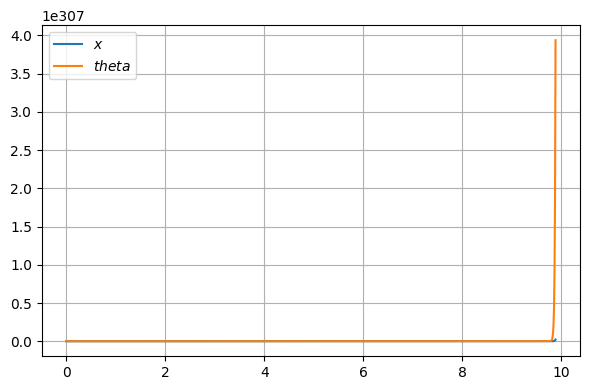

In [145]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=4)

# First set up the parameters for the pendulum.  I will use the values for the WWU pendulum as much as I can.
mb = 0.7177 # Mass of cart (kg)
mw = 0.0982 # Mass of the long pendulum (kg)
R = 4.6 # Motor resistance (Ohms)
r = 0.03375  # Pulley radius (meters)
Ib = 1.7630*10**-4 # Moment of Inertia of Body
Iw = 2.79639*10**-5 # Moment of Inertia of Wheel
L = 0.017 # length of the long pendulum rod (meters)
g = 9.81  # gravity (m/s^2)
k = 0.0298 # motor constant
s = 1  #  -1 for hanging down; +1 for up
def setupModel(mb = 0.7177,mw = 0.0982,R = 4.6,r = 0.03375,Ib = 1.7630*10**-4,Iw = 2.79639*10**-5,L= 0.017,g = 9.81,k = 0.0298,s = 1):
    # Now the state model
    A = np.array([[0,1,0,0],[0,-(60*k**2)/(r**2*R*mw+Iw*R),-(mb*g*r**2)/(mw*r**2+Iw),((Ib*r**2)/(mw*L*r**2+Iw*L))],[0,0,0,1],[0,-(60*k**2)/(r**2*R*mw*L+Iw*R*L),((mb*g*r**2+mw*g*r**2+Iw*g)/(mw*L*r**2+Iw*L)),-(r**2*mb*Ib+r**2*mw*Ib+Iw*Ib)/(mb*mw*L**2*r**2+mb*Iw*L**2)]])
    B = np.array([[0],[2*k/(r*R*mw+(Iw*R)/r)],[0],[-2*k/(R*mw*L*r+(Iw/r)*L*R)]])
   # C = np.array([[1.83/r,0,0,0],[0,0,1,0]]);
    #C = np.identity(4)
    C = np.array([[29.630,0,0,0],[0,-82.643,-57.358,0.084485],[0,0,0,1]])
    D = 0;
    pendsys = ct.ss(A, B, C, D)
    return pendsys

pendsys = setupModel(mb = 0.7177,mw = 0.0982,R = 4.6,r = 0.03375,Ib = 1.7630*10**-4,Iw = 2.79639*10**-5,L = 0.017,g = 9.81,k = 0.0298,s = 1)
print(pendsys)
x0 = [0,0.1,0,0]
t = np.arange(0, 15, 0.01)
(t, y) = ct.initial_response(pendsys,t, x0)

def displayPendSimulation(t, y):
    fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
    ax.plot(t, y[0,:])
    ax.plot(t, y[1,:])
   # ax.plot(t, y[2,:])
   # ax.plot(t, y[3,:])
    #ax.plot(t, u[0,:])
    #, r'$\theta$',r'$x(dot)$'
    ax.legend([r'$x$','$theta$']) #, r'$\dot y$', r'$\dot \theta$'])
    plt.grid()
    
def displayEPendSimulation(ft, fy, fx):
    fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
    ax.plot(ft, fy[0,:])
    ax.plot(ft, fy[1,:])
    ax.plot(ft, fx[4,:])
    #ax.plot(ft, fy[2,:])
    #ax.plot(ft, fy[3,:])
    #ax.plot(t, u[0,:])
    #, r'$\theta$',r'$x(dot)$'
    ax.legend([r'$x$','$theta$','$e$']) #, r'$\dot y$', r'$\dot \theta$'])
    plt.grid()
    
def displayUPendSimulation(u):
    fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
    ax.plot(t, u[0,:])
    #, r'$\theta$',r'$x(dot)$'
    ax.legend([r'$u$']) #, r'$\dot y$', r'$\dot \theta$'])
    plt.grid()
    
def getABCD(pendsys):
    # %% Getting the model matrices as lists and then as arrays :
    ( A_list , B_list , C_list , D_list ) = ct.ssdata(pendsys)
    A = np.array ( A_list )
    B = np.array ( B_list )
    C = np.array ( C_list )
    D = np.array ( D_list )
    return A, B, C, D
    
def displayEigenStuff(A):
    (w, v) = np.linalg.eig(A)
    print('Eigenvalues of A:', w)
    print('Eigenvectors of A:')
    print(v)
    return v, w
    
A, B, C, D = getABCD(pendsys)
v, w = displayEigenStuff(A)
displayPendSimulation(t, y)

In [146]:
Q = np.hstack([B, np.matmul(A, B), np.matmul(A, np.matmul(A, B)),np.matmul(A, np.matmul(A, np.matmul(A, B)))])
print(Q)
Rank_Q = np.linalg.matrix_rank(Q)
print('Rank of Q is:', Rank_Q)
print('SVD of Q:')
(U,S,V) = np.linalg.svd(Q, full_matrices=True)
print('U :')
print(U)
print('S :', S)
print('V :')
print(V)

[[ 0.0000e+00  3.1275e+00 -2.7463e+02  3.2106e+04]
 [ 3.1275e+00 -2.7463e+02  3.2106e+04 -1.7884e+06]
 [ 0.0000e+00 -1.8397e+02 -1.4170e+04  6.9392e+05]
 [-1.8397e+02 -1.4170e+04  6.9392e+05 -2.1648e+08]]
Rank of Q is: 4
SVD of Q:
U :
[[-1.4831e-04  5.9298e-03  2.6860e-03  9.9998e-01]
 [ 8.2613e-03 -9.1087e-01 -4.1256e-01  6.5108e-03]
 [-3.2055e-03  4.1255e-01 -9.1093e-01 -4.9807e-08]
 [ 9.9996e-01  8.8486e-03  4.8872e-04  9.4518e-05]]
S : [2.1649e+08 2.8952e+04 2.7397e+02 2.9739e-03]
V :
[[-8.4962e-07 -6.5458e-05  3.2066e-03 -9.9999e-01]
 [-1.5462e-04  1.6887e-03 -9.9999e-01 -3.2067e-03]
 [-5.0377e-03  9.9999e-01  1.6897e-03 -6.0035e-05]
 [ 9.9999e-01  5.0379e-03 -1.4611e-04 -1.6479e-06]]


### Stable Pendulum Simulation

<LinearIOSystem>: sys[313]
Inputs (1): ['u[0]']
Outputs (3): ['y[0]', 'y[1]', 'y[2]']
States (4): ['x[0]', 'x[1]', 'x[2]', 'x[3]']

A = [[ 0.0000e+00  1.0000e+00  0.0000e+00  0.0000e+00]
     [ 0.0000e+00 -8.2843e+01 -5.7358e+01  8.4485e-02]
     [ 0.0000e+00  0.0000e+00  0.0000e+00  1.0000e+00]
     [ 0.0000e+00 -4.8731e+03  3.9510e+03 -5.8197e+00]]

B = [[   0.    ]
     [   3.1275]
     [   0.    ]
     [-183.9689]]

C = [[ 29.63     0.       0.       0.    ]
     [  0.     -82.643  -57.358    0.0845]
     [  0.       0.       0.       1.    ]]

D = [[0.]
     [0.]
     [0.]]

Eigenvalues of A: [  0.     +0.j     -80.2138+44.9618j -80.2138-44.9618j  71.7646 +0.j    ]
Eigenvectors of A:
[[ 1.0000e+00+0.0000e+00j  1.4381e-04-8.8127e-05j  1.4381e-04+8.8127e-05j
  -6.4413e-05+0.0000e+00j]
 [ 0.0000e+00+0.0000e+00j -7.5736e-03+1.3535e-02j -7.5736e-03-1.3535e-02j
  -4.6226e-03+0.0000e+00j]
 [ 0.0000e+00+0.0000e+00j  9.4845e-03+5.3163e-03j  9.4845e-03-5.3163e-03j
   1.3933e-02+0.0000e+00j]

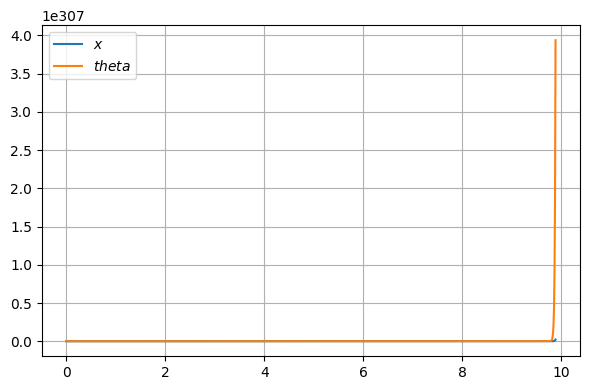

In [147]:
s = 1; # Hanging down
pendsys = setupModel(mb = 0.7177,mw = 0.0982,R = 4.6,r = 0.03375,Ib = 1.7630*10**-4,Iw = 2.79639*10**-5,L = 0.017,g = 9.81,k = 0.0298,s = 1);
print(pendsys)
x0 = [0,0.1,0,0]
(t, y, x) = ct.initial_response(pendsys,t, x0,return_x=True)
A, B, C, D = getABCD(pendsys)
v, w = displayEigenStuff(A)
displayPendSimulation(t, y)

Remember this is the result of a simulation of a linear model.  The question to ask is, "Is this accurate?"  To check this out, remember the approximations we made were $cos \theta \approx 1$ and $sin\theta \approx \theta$.  For the largest angles we see this works out to be:

K
[[-17.4541  -6.0372 -20.0641  -0.0447]]
G
[[-70710.6781   -393.7127  -6227.8659  -1007.2897]]
L
[[ 1.0000e+01  6.0787e-04 -3.8308e-03]
 [ 1.2662e-03  7.5538e-01 -1.3903e+00]
 [-2.3056e-03 -1.3964e+01  3.4509e+00]
 [-1.1351e-01 -6.7433e+01  1.8473e+02]]
K_fullO
[[ 5.5583e+00 -9.3820e-01  5.6935e-02]
 [ 2.5942e+00 -9.1978e-01 -8.1861e-01]
 [ 1.8001e+00 -1.3340e+00  2.5485e+00]
 [-9.5988e-03  1.7388e+01  3.7265e+02]]
top left
[[ 0.0000e+00  1.0000e+00  0.0000e+00  0.0000e+00]
 [ 2.2115e+05  1.1485e+03  1.9420e+04  3.1504e+03]
 [ 0.0000e+00  0.0000e+00  0.0000e+00  1.0000e+00]
 [-1.3009e+07 -7.7304e+04 -1.1418e+06 -1.8532e+05]]
top right
[[ 0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00]
 [-2.2115e+05 -1.2313e+03 -1.9477e+04 -3.1503e+03]
 [ 0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00]
 [ 1.3009e+07  7.2431e+04  1.1457e+06  1.8531e+05]]
bottom left
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
bottom right
[[-2.9630e+02  1.0502e+00  3.4866e-02  3.7794e-03]
 [-3.7517e-02 

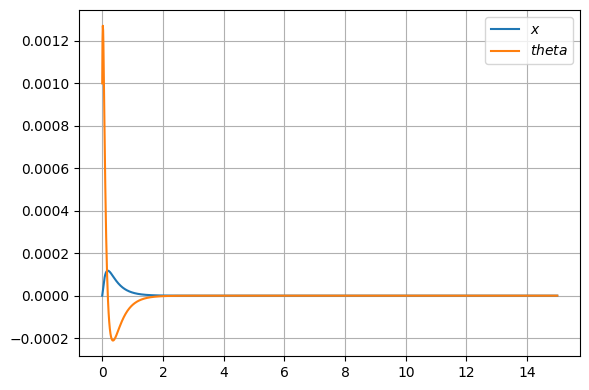

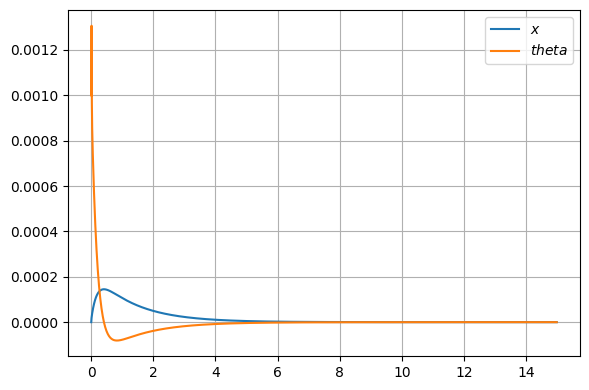

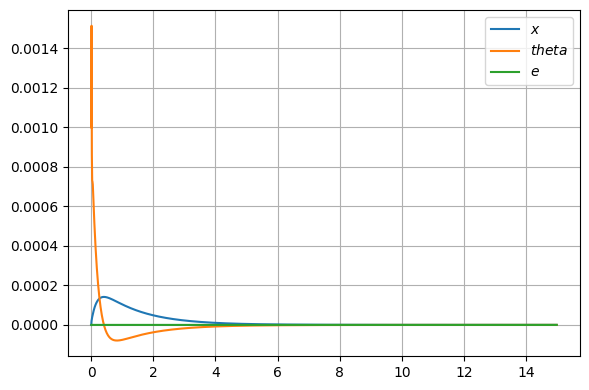

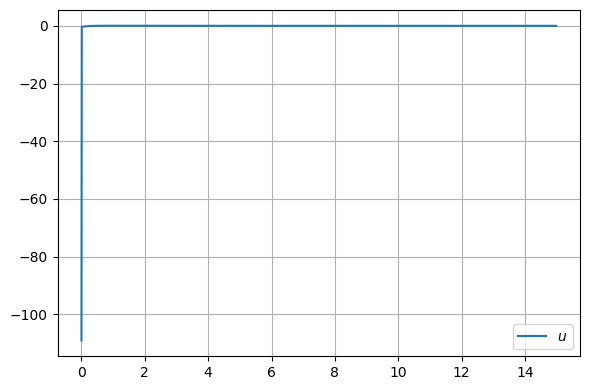

In [177]:
x0 = [0, 0.001, 0.01745329, 0]
x0e0 = [0, 0.001, 0.01745329, 0, 0, 0.001, 0.01745329,0]
Z = np.identity(4)
Y = 0

#place poles by hand
K = ct.place(A,B,[-35,-10,-3,-30])
#K = ct.place(A,B,[-350,-20,-300,-40])
pendsys_fb = ct.ss(np.subtract(A, np.matmul(B, K)), B, Z, Y);
t, y, x = ct.initial_response(pendsys_fb, t, x0,return_x=True)
displayPendSimulation(t, y)
#print(pendsys_fb)

#lqr
Q_lqr = [[500000,0,0,0],[0,100,0,0],[0,0,3000,0],[0,0,0,100]]
R_lqr = [0.0001]
G_lqr,S_lqr,E_lqr = ct.lqr(A,B,Q_lqr,R_lqr)
print('K')
print(K)
print('G')
print(G_lqr)
pendsys_LQRfb = ct.ss(np.subtract(A, np.matmul(B, G_lqr)), B, Z, Y);
lqrt, lqry, lqrx = ct.initial_response(pendsys_LQRfb, t, x0,return_x=True)
displayPendSimulation(lqrt, lqry)


#full order observer
QN = [[100,0,0,0],[0,1,0,0],[0,0,200,0],[0,0,0,1]]
RN = [[1,0,0],[0,1,0],[0,0,1]]
GN = np.identity(4)
A_trans = A.transpose()
C_trans = C.transpose()
K_Trans = ct.place(A_trans,C_trans,[-350,-100,-30,-300])

L_lqe, P_lqe, E_lqe = ct.lqe(A, GN, C, QN, RN)
print('L')
print(L_lqe)

#find 8x8
topLeft = A - np.dot(B,G_lqr)
topRight = np.dot(B,G_lqr)
bottomLeft = np.zeros((4,4))
#get ktrans into a 4,3
K_fullOrder = K_Trans.transpose()
print('K_fullO')
print(K_fullOrder)
#bottomRight = A - np.dot(K_fullOrder,C)
bottomRight = A - np.dot(L_lqe,C)
print("top left")
print(topLeft)
print("top right")
print(topRight)
print("bottom left")
print(bottomLeft)
print("bottom right")
print(bottomRight)
LeftSide = np.concatenate((topLeft,bottomLeft))
RightSide = np.concatenate((topRight,bottomRight))
A_fullOrder = np.concatenate((LeftSide,RightSide), axis=1)
print("A_fullorder")
print(A_fullOrder)
B_fullOrder = np.zeros((8,1))
C_fullOrder = np.identity(8)
D_fullOrder = np.zeros((8,1))
fullOrderPendsys = ct.ss(A_fullOrder, B_fullOrder, C_fullOrder, D_fullOrder)
ft, fy, fx = ct.initial_response(fullOrderPendsys, t, x0e0,return_x=True)
displayEPendSimulation(ft, fy, fx)


#display system and u
u = np.dot(G_lqr,lqrx)
print(' ')
print('u')
print(u)
A_fb, B_fb, C_fb, D_fb = getABCD(pendsys_fb)
v, w = displayEigenStuff(A_fb)
displayUPendSimulation(u)